# Maio Amarelo: Análise dos acidentes em rodovias federais com Data Science

No ano de 2018, conforme dados do Observatório Nacional de Segurança Viária (ONSV) - https://bit.ly/2KW0n05, ocorreram mais de 32 mil mortes decorrentes de acidentes de trânsito no território brasileiro. Número este bem expressivo e que nos leva a perceber a necessidade de ações voltadas para a conscientização e acima de tudo educação no trânsito.

Tendo isso em mente, foi criado o **Maio Amarelo**.

<center><img src="https://maioamarelo.com/wp-content/uploads/2019/04/maio-amarelo-header.png"></center>

É um movimento internacional de conscientização para redução de acidentes de trânsito.

Em 11 de maio de 2011, a ONU decretou a Década de Ação para Segurança no Trânsito. Com isso, o mês de maio se tornou referência mundial para balanço das ações que o mundo inteiro realiza.

O que trago neste artigo é muito mais que apenas um artigo de Ciência de Dados. É uma pequena contribuição que visa ajudar a entender a extensão desse problema no Brasil, além de incentivar o Maio Amarelo dentro da comunidade Python e Data Science.

## Descrição dos dados

Nesta análise vamos trabalhar com os dados referentes a acidentes em rodovias federais ocorridos no ano de 2018. 

Na página do Kaggle (https://bit.ly/3n9GO1w), estão disponibilizados os dados de acidentes em rodovias federais do período de Jan/2007 a Jul/2019, dados estes abertos ao público e retirados do portal da Polícia Rodoviária Federal.

In [2]:
# Importando os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importando a base de dados para um DataFrame
df = pd.read_excel('datatran2018.xlsx')

In [4]:
# Visualizando as primeiras 5 linhas do DataFrame
df.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,99973,2018-01-01,segunda-feira,00:20:00,RJ,116.0,303.5,RESENDE,Condutor Dormindo,Saída de leito carroçável,...,4,1,0,4,1,-2.246937e+06,-4.444705e+06,SR-RJ,DEL5/7,UOP03/RJ
1,99976,2018-01-01,segunda-feira,00:40:00,SC,282.0,0.4,FLORIANOPOLIS,Não guardar distância de segurança,Colisão traseira,...,2,1,0,2,2,-2.759972e+09,-4.857566e+09,SR-SC,DEL8/1,UOP01/SC
2,99977,2018-01-01,segunda-feira,00:30:00,RJ,493.0,1.0,ITABORAI,Ultrapassagem Indevida,Colisão frontal,...,0,3,1,1,3,-2.276390e+07,-4.292753e+07,SR-RJ,DEL5/4,UOP02/RJ
3,99981,2018-01-01,segunda-feira,01:15:00,RS,386.0,134.0,SARANDI,Ingestão de Álcool,Colisão transversal,...,0,2,0,0,2,-2.795364e+07,-5.291637e+07,SR-RS,DEL9/14,UOP01/RS
4,99982,2018-01-01,segunda-feira,00:20:00,RS,293.0,151.7,CANDIOTA,Falta de Atenção à Condução,Saída de leito carroçável,...,1,0,0,1,1,-3.139521e+07,-5.378391e+09,SR-RS,DEL9/11,UOP03/RS


In [21]:
# Verificando as variáveis (Colunas) presentes no DataFrame
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia',
       'uop'],
      dtype='object')

In [6]:
# Verificando o tamanho (Linhas e colunas) do DataFrame
df.shape

(69206, 30)

In [ ]:
# Excluindo do dataframe a coluna 'ignorados' que não será utilizada na análise
df.drop(columns=['ignorados'])

## Dicionário de Variáveis

Esse arquivo .xlsx possui 30 colunas (variáveis), sendo elas:

* **id:** Número da ocorrência.


* **data_inversa:** Data da ocorrência (ano-mês-dia).


* **dia_semana:** Dia da semana da ocorrência.


* **horario:** Horário da ocorrência.


* **uf:** Estado (Unidade da Federação) da ocorrência.


* **br:** Rodovia da ocorrência.


* **km:** Altura da rodovia onde foi a ocorrência.


* **municipio:** Município da ocorrência.


* **causa_acidente:** Causa da ocorrência.


* **tipo_acidente:** Tipo da ocorrência.


* **classificacao_acidente:** Classificação da ocorrência (Com ou sem vítimas).


* **fase_dia:** Fase do dia na qual se deu a ocorrência (Pleno dia, Plena noite, Amanhecer, Anoitecer).


* **sentido_via:** Sentido da via no qual se deu a ocorrência (Decrescente, crescente).


* **condicao_metereologica:** Condição meteorológica no momento da ocorrência.


* **tipo_pista:** Tipo de pista na qual se deu a ocorrência (Simples, Dupla, Múltipla).


* **tracado_via:** Se o local do acidente foi uma reta, uma curva, rotatória, etc.


* **uso_solo:** Se o local no qual ocorreu o acidente está localizado em área com utilização do solo, seja para agricultura ou área urbana ou se ocorreu em local de solo virgem, com floresta ou vegetação nativa. 


* **pessoas:** Quantidade de pessoas envolvidas na ocorrência


* **mortos:** Quantidade de pessoas que perderam a vida na ocorrência


* **feridos_leves:** Quantidade de pessoas que tiveram ferimentos leves decorrentes da ocorrência


* **feridos_grave:** Quantidade de pessoas que tiveram ferimentos graves decorrentes da ocorrência


* **ilesos:** Quantidade de pessoas que não sofreram nenhum tipo de ferimento decorrente da ocorrência


* **feridos:** Quantidade total de feridos, é a soma de feridos_leves + feridos_graves


* **veiculos:** Quantidade de veículos envolvidos na ocorrência


* **latitude:** Coordenada geográfica (Latidade) do local da ocorrência


* **longitude:** Coordenada geográfica (longitude) do local da ocorrência


* **regional:** Qual a regional (PRF) responsável pela localidade onde ocorreu o acidente


* **delegacia:** Qual a delegacia (PRF) responsável pela localidade onde ocorreu o acidente


* **uop:** Qual a Unidade Operacional de Policianemto (PRF) responsável pela localidade onde ocorreu o acidente

## Análise exploratória dos dados

In [23]:
# Verificando se existe algum valor nulo (NaN) no dataframe que possam comprometer nossa análise
df.isnull().sum()

id                           0
data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                         114
km                         114
municipio                    0
causa_acidente               0
tipo_acidente                0
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
uso_solo                     0
pessoas                      0
mortos                       0
feridos_leves                0
feridos_graves               0
ilesos                       0
feridos                      0
veiculos                     0
latitude                     0
longitude                    0
regional                     0
delegacia                    0
uop                       1366
dtype: int64

#### Podemos verificar que existem 114 valores nulos nas colunas 'br', 'km' e 1366 valores nulos na coluna 'uop', porém são valores que não irão influenciar negativamente nossa análise, pois são variáveis que não serão utilizadas em nossa análise.

### Estados com maior número de acidentes em rodovias federais

A primeira análise que realizarei diz respeito a quantidade de acidentes por estado, para avaliarmos em qual estado acontecem mais acidentes nas rodovias federais

In [40]:
acidentes_por_estado = df['uf'].value_counts()
acidentes_por_estado

MG    9052
SC    8494
PR    7934
RJ    4563
SP    4512
RS    4442
BA    3545
GO    3460
PE    2714
ES    2641
MT    2628
CE    1696
RO    1629
PB    1586
MS    1529
RN    1414
PI    1367
MA    1272
PA    1259
DF     867
AL     691
TO     589
SE     559
RR     236
AC     230
AP     173
AM     124
Name: uf, dtype: int64

Observamos que Minas Gerais, Santa Catarina e Paraná concentram uma grande quantidade de ocorrências, porém analisar olhando apenas os números não é a forma mais fácil, agora vamos olhar os mesmos dados, porém de forma percentual.

In [47]:
acidentes_por_estado_percentual = df['uf'].value_counts(normalize=True)*100
acidentes_por_estado_percentual

MG    13.079791
SC    12.273502
PR    11.464324
RJ     6.593359
SP     6.519666
RS     6.418519
BA     5.122388
GO     4.999567
PE     3.921625
ES     3.816143
MT     3.797359
CE     2.450655
RO     2.353842
PB     2.291709
MS     2.209346
RN     2.043175
PI     1.975262
MA     1.837991
PA     1.819206
DF     1.252782
AL     0.998468
TO     0.851082
SE     0.807733
RR     0.341011
AC     0.332341
AP     0.249978
AM     0.179175
Name: uf, dtype: float64

Através das análises dos números de acidentes e do percentual de acidentes em cada estado, já podemos concluir que os 3 estados recordistas em acidentes em rodovias federais no ano de 2018 foram Minas Gerais, Santa Catarina e Paraná.

In [84]:
# Transformando a Series criada assim em um dataframe, para que possamos desenvolver um 
# gráfico com o percentual de ocorrências em cada estado

dist_acidentes = pd.DataFrame({'Qtd de ocorrências': df['uf'].value_counts(), 'Pocentagem (%)': acidentes_por_estado_percentual})
dist_acidentes.reset_index(level=0, inplace=True)
dist_acidentes.columns=['Estado', 'Qtd de ocorrências', 'Pocentagem (%)']
dist_acidentes

,Estado,Qtd de ocorrências,Pocentagem (%)
0,MG,9052,13.079791
1,SC,8494,12.273502
2,PR,7934,11.464324
3,RJ,4563,6.593359
4,SP,4512,6.519666
5,RS,4442,6.418519
6,BA,3545,5.122388
7,GO,3460,4.999567
8,PE,2714,3.921625
9,ES,2641,3.816143


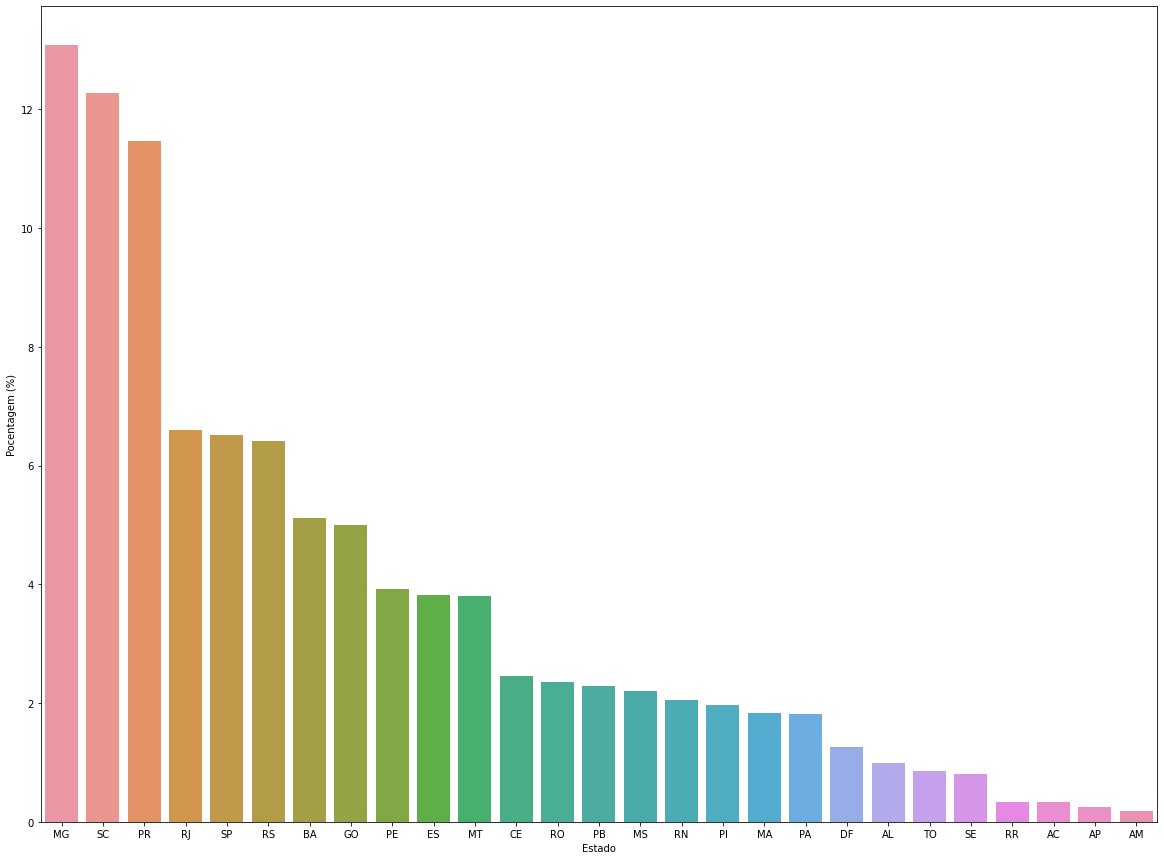

In [90]:
# Verificando graficamente as observações realizadas

grafico = sns.barplot(x='Estado', y="Pocentagem (%)", data=dist_acidentes)
grafico.figure.set_size_inches(20,15)

Podemos perceber como é significativa a diferença entre os 3 primeiros estados (MG, SC, PR) e os outros estados. 

Graficamente a análise fica mais clara e objetiva. 